In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('nba.csv')
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State


In [ ]:
df.shape

(429, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    429 non-null    object
 1   rating       429 non-null    int64 
 2   jersey       429 non-null    object
 3   team         406 non-null    object
 4   position     429 non-null    object
 5   b_day        429 non-null    object
 6   height       429 non-null    object
 7   weight       429 non-null    object
 8   salary       429 non-null    object
 9   country      429 non-null    object
 10  draft_year   429 non-null    int64 
 11  draft_round  429 non-null    object
 12  draft_peak   429 non-null    object
 13  college      363 non-null    object
dtypes: int64(2), object(12)
memory usage: 47.0+ KB


In [ ]:
new = df.fillna(method = 'ffill')
new

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,San Diego State
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,Brandon Goodwin,68,#0,Atlanta Hawks,G,10/02/95,6-0 / 1.83,180 lbs. / 81.6 kg.,$522738,USA,2018,Undrafted,Undrafted,Florida Gulf Coast
425,Michael Frazier,68,#21,Houston Rockets,G,03/08/94,6-3 / 1.91,200 lbs. / 90.7 kg.,$79568,USA,2015,2,60,Florida
426,Kostas Antetokounmpo,68,#37,Los Angeles Lakers,F,11/20/97,6-10 / 2.08,200 lbs. / 90.7 kg.,$79568,Greece,2018,Undrafted,Undrafted,Dayton
427,Jalen Lecque,68,#0,Phoenix Suns,G,06/13/00,6-3 / 1.91,190 lbs. / 86.2 kg.,$898310,USA,2019,Undrafted,Undrafted,Dayton


In [ ]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    429 non-null    object
 1   rating       429 non-null    int64 
 2   jersey       429 non-null    object
 3   team         429 non-null    object
 4   position     429 non-null    object
 5   b_day        429 non-null    object
 6   height       429 non-null    object
 7   weight       429 non-null    object
 8   salary       429 non-null    object
 9   country      429 non-null    object
 10  draft_year   429 non-null    int64 
 11  draft_round  429 non-null    object
 12  draft_peak   429 non-null    object
 13  college      428 non-null    object
dtypes: int64(2), object(12)
memory usage: 47.0+ KB


In [ ]:
new = new.dropna()

In [ ]:
new.isnull().sum().sum()

0

In [ ]:
new.isnull().sum()

full_name      0
rating         0
jersey         0
team           0
position       0
b_day          0
height         0
weight         0
salary         0
country        0
draft_year     0
draft_round    0
draft_peak     0
college        0
dtype: int64

In [ ]:
new = new.drop(['full_name', 'b_day', 'height', 'weight', 'college'], axis = 1)
new.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
1,97,#2,Los Angeles Clippers,F,$32742000,USA,2011,1,15
2,96,#34,Milwaukee Bucks,F-G,$25842697,Greece,2013,1,15
3,96,#7,Brooklyn Nets,F,$37199000,USA,2007,1,2
4,96,#13,Houston Rockets,G,$38199000,USA,2009,1,3
5,95,#30,Golden State Warriors,G,$40231758,USA,2009,1,7


In [ ]:
#remove hashes in jersey
def removeHash(val):
  val = val[1:]
  return int(val)

new['jersey'] = new['jersey'].apply(removeHash)

In [ ]:
new.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
1,97,2,Los Angeles Clippers,F,$32742000,USA,2011,1,15
2,96,34,Milwaukee Bucks,F-G,$25842697,Greece,2013,1,15
3,96,7,Brooklyn Nets,F,$37199000,USA,2007,1,2
4,96,13,Houston Rockets,G,$38199000,USA,2009,1,3
5,95,30,Golden State Warriors,G,$40231758,USA,2009,1,7


In [ ]:
new['salary'] = new['salary'].apply(removeHash)
new.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
1,97,2,Los Angeles Clippers,F,32742000,USA,2011,1,15
2,96,34,Milwaukee Bucks,F-G,25842697,Greece,2013,1,15
3,96,7,Brooklyn Nets,F,37199000,USA,2007,1,2
4,96,13,Houston Rockets,G,38199000,USA,2009,1,3
5,95,30,Golden State Warriors,G,40231758,USA,2009,1,7


In [ ]:
new['team'].value_counts()

Phoenix Suns              18
Milwaukee Bucks           18
Chicago Bulls             17
New Orleans Pelicans      16
Dallas Mavericks          16
Boston Celtics            15
Minnesota Timberwolves    15
Los Angeles Lakers        15
Indiana Pacers            15
Orlando Magic             15
Washington Wizards        15
New York Knicks           15
Sacramento Kings          15
Philadelphia 76ers        15
Memphis Grizzlies         15
Brooklyn Nets             14
San Antonio Spurs         14
Oklahoma City Thunder     14
Houston Rockets           14
Toronto Raptors           14
Denver Nuggets            14
Los Angeles Clippers      14
Detroit Pistons           14
Atlanta Hawks             13
Utah Jazz                 12
Miami Heat                12
Cleveland Cavaliers       12
Portland Trail Blazers    12
Charlotte Hornets         11
Golden State Warriors      9
Name: team, dtype: int64

In [ ]:
new['country'].value_counts()

USA                                 322
Canada                               15
Australia                             9
France                                8
Spain                                 6
Germany                               6
Croatia                               6
Serbia                                5
Turkey                                4
Italy                                 4
Latvia                                3
Greece                                3
Nigeria                               3
Democratic Republic of the Congo      2
Slovenia                              2
The Bahamas                           2
Lithuania                             2
Ukraine                               2
Cameroon                              2
Brazil                                2
Bosnia and Herzegovina                2
Georgia                               1
Switzerland                           1
Senegal                               1
Japan                                 1


In [ ]:
def removeOutliersCountry(val):
  if val not in ['USA', 'Canada','Australia','France','Spain','Germany','Croatia']:
    return 'Others'
  else:
    return val

In [ ]:
new['country'] = new['country'].apply(removeOutliersCountry)
new['country'].value_counts()

USA          322
Others        56
Canada        15
Australia      9
France         8
Spain          6
Germany        6
Croatia        6
Name: country, dtype: int64

In [ ]:
def undrafted(val):
  if val == 'Undrafted':
    return
  else:
    return val

In [ ]:
new['draft_peak'] = new['draft_peak'].apply(undrafted)
new['draft_round'] = new['draft_round'].apply(undrafted)

In [ ]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 1 to 428
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rating       428 non-null    int64 
 1   jersey       428 non-null    int64 
 2   team         428 non-null    object
 3   position     428 non-null    object
 4   salary       428 non-null    int64 
 5   country      428 non-null    object
 6   draft_year   428 non-null    int64 
 7   draft_round  361 non-null    object
 8   draft_peak   361 non-null    object
dtypes: int64(4), object(5)
memory usage: 33.4+ KB


In [ ]:
new = new.fillna(method = 'ffill')

In [ ]:
new.isnull().sum().sum()

0

In [ ]:
# for string columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new['position'] = le.fit_transform(new['position'])
new['team'] = le.fit_transform(new['team'])
new['country'] = le.fit_transform(new['country'])

In [ ]:
new.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
1,97,2,12,2,32742000,7,2011,1,15
2,96,34,16,4,25842697,5,2013,1,15
3,96,7,2,2,37199000,7,2007,1,2
4,96,13,10,5,38199000,7,2009,1,3
5,95,30,9,5,40231758,7,2009,1,7


In [ ]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 1 to 428
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rating       428 non-null    int64 
 1   jersey       428 non-null    int64 
 2   team         428 non-null    int64 
 3   position     428 non-null    int64 
 4   salary       428 non-null    int64 
 5   country      428 non-null    int64 
 6   draft_year   428 non-null    int64 
 7   draft_round  428 non-null    object
 8   draft_peak   428 non-null    object
dtypes: int64(7), object(2)
memory usage: 33.4+ KB


In [ ]:
new.describe()

,rating,jersey,team,position,salary,country,draft_year
count,428.000000,428.000000,428.000000,428.000000,4.280000e+02,428.000000,428.000000
mean,76.324766,14.607477,14.672897,3.268692,8.462541e+06,6.179907,2014.119159
std,5.575510,16.172522,8.576451,1.824951,9.121959e+06,1.714484,3.905477
min,67.000000,0.000000,0.000000,0.000000,5.000000e+04,0.000000,2001.000000
25%,72.000000,2.000000,7.000000,2.000000,2.000000e+06,7.000000,2012.000000
50%,75.000000,10.000000,15.000000,3.000000,4.310160e+06,7.000000,2015.000000
75%,79.000000,22.000000,22.000000,5.000000,1.211977e+07,7.000000,2017.000000
max,97.000000,99.000000,29.000000,6.000000,4.023176e+07,7.000000,2019.000000


In [ ]:
x = new.drop(['salary'],axis = 1)
y = new['salary']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred = lr.predict(x_test)

In [ ]:
diff = y_test - pred

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


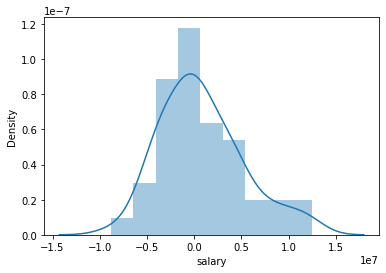

In [ ]:
import seaborn as sns
sns.distplot(diff)

In [ ]:
lr.score(x_test,y_test)

0.7448480482433395

In [ ]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
pred = lr.predict(x_test)

In [ ]:
diff = y_test - pred

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


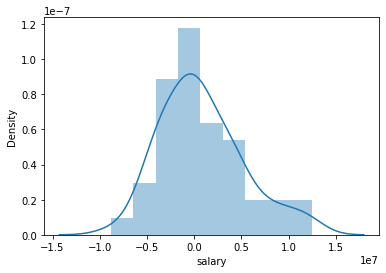

In [ ]:
import seaborn as sns
sns.distplot(diff)

In [ ]:
clf.score(x_test,y_test)

0.796075074970175

In [ ]:
import pickle
pickle.dump(clf,open('./model.sav','wb'))